#  6.2 Term Project Milestone 1. Data Selection and EDA

#                                          Heart Failure Survival

#   

Heart failure (HF) is one of several cardiovascular diseases which kill upwards of 17 million people worldwide annually. Heart failure is marked by the inability of the heart to pump enough blood to sufficiently perfuse the body. Important factors in this insidious disease include diabetes, hypertension, and other cardiac conditions. The medical community has yet to achieve any reasonable accuracy in predicting survival of the disease. While there is consensus on the factors involved in HF, there is no consensus as to how to give a risk score. How much does each factor contribute to the survival model, whether predicting impairment, hospitalization or death? Scientists have begun to leverage ML on medical records to create models that can better predict HF outcomes and that assess feature ranking. 

There are two types of HF. Heart failure due to reduced ejection fraction occurs when the heart cannot pump enough blood out of the left ventricle, which is responsible for contracting and sending blood to the entire body. An ejection fraction (the proportion of blood pumped out of the left ventricle during systole) less than 40% is the manifestation of this type of HF. The second type of HF, where the ejection fraction is normal, is characterized by the inability of the heart muscle to relax properly during diastole to fill up adequately.  

The dataset I wish to explore is housed at the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records). It contains the medical records of 299 HF patients in Pakistan, collected between April and December 2015. All 13 feature columns are appropriate indicators in HF. However, anemia, hypertension, diabetes, and smoking are binary columns. The normal hematocrit for males is a minimum of 41% and for females is 36%. The dataset uses 36% as its cutoff, but does not show a range for anemic patients. For hypertension, no cutoff is even given, let alone a range. The death event feature is defined as survival or not by the end of the follow-up period, the time column. Creatinine phosphokinase (CPK) in the blood is an indicator of muscle damage. HF manifests in heart muscle damage, such as stiffness, etc. Serum creatinine and sodium levels in the blood are markers which show how the body is working. When muscle breaks down, creatine metabolizes to a waste product called serum creatinine. Low levels of sodium may be caused by HF. There is imbalance in the dataset both relative to sex and to death event. Of the women, 71 survived and 34 died. Among men, 132 survived and 72 did not. 

I originally wished to explore whether eliminating the ejection feature column would lead to better predictions. This is because lesser ejection fractions are only associated with systolic heart failure, and presumably a sample of HF patients would include HF patients with diastolic heart failure, who exhibit normal ejection fraction. Davide Chicco asserts that all subjects of the study suffered from left ventricular systolic dysfunction (https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5#Sec2). I will therefore explore whether ejection fraction may be the best predictor individually or with some of the other features. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
heart_failure_df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
heart_failure_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
heart_failure_df.sex.value_counts()

1    194
0    105
Name: sex, dtype: int64

In [4]:
heart_failure_df.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [5]:
heart_failure_df.groupby('sex').DEATH_EVENT.value_counts()

sex  DEATH_EVENT
0    0               71
     1               34
1    0              132
     1               62
Name: DEATH_EVENT, dtype: int64

In [6]:
heart_failure_df['age'].describe()

count    299.000000
mean      60.833893
std       11.894809
min       40.000000
25%       51.000000
50%       60.000000
75%       70.000000
max       95.000000
Name: age, dtype: float64

In [7]:
heart_failure_df.creatinine_phosphokinase.describe()

count     299.000000
mean      581.839465
std       970.287881
min        23.000000
25%       116.500000
50%       250.000000
75%       582.000000
max      7861.000000
Name: creatinine_phosphokinase, dtype: float64

In [8]:
heart_failure_df.platelets.describe()

count       299.000000
mean     263358.029264
std       97804.236869
min       25100.000000
25%      212500.000000
50%      262000.000000
75%      303500.000000
max      850000.000000
Name: platelets, dtype: float64

In [9]:
heart_failure_df.shape

(299, 13)

In [10]:
heart_failure_df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [11]:
heart_failure_df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [12]:
heart_failure_df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


#  Histograms of all Variables

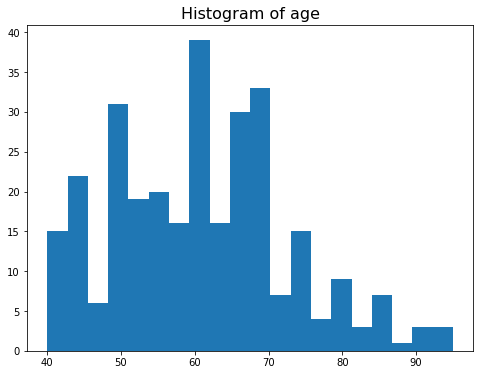

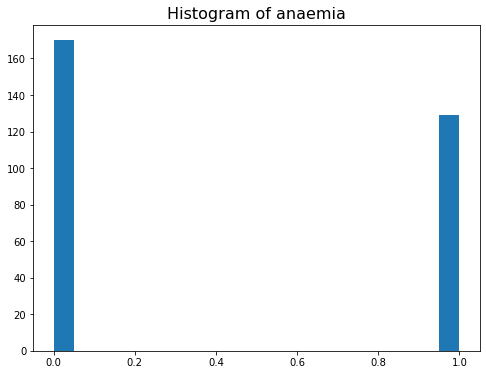

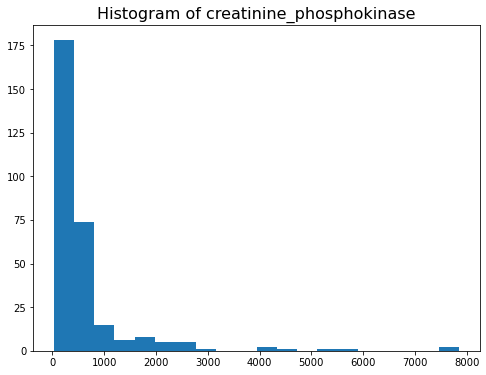

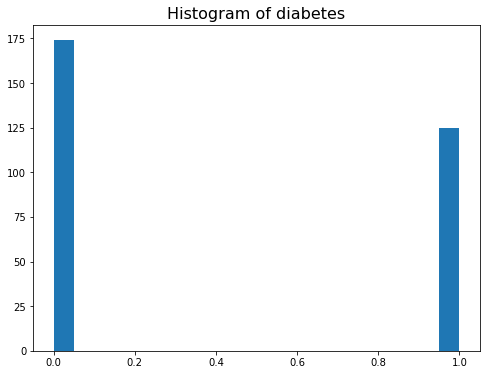

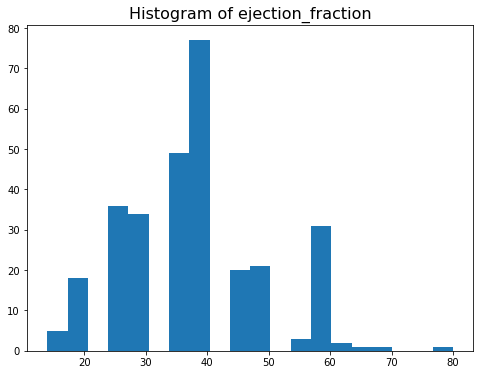

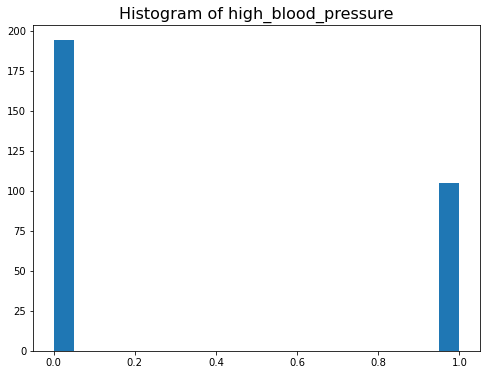

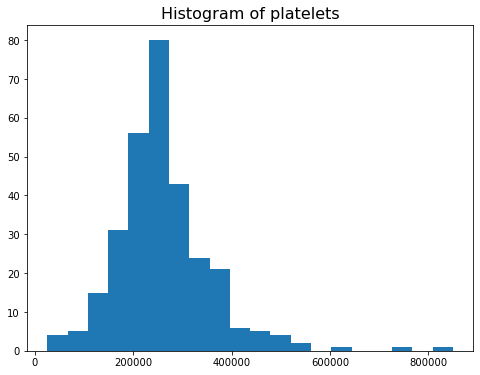

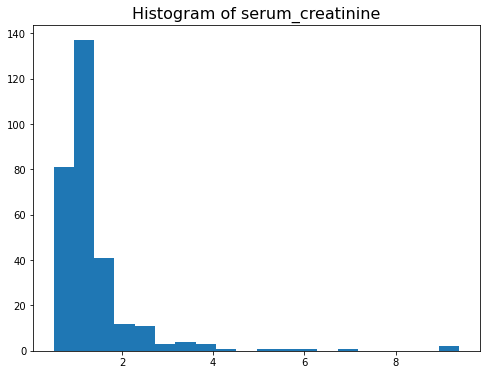

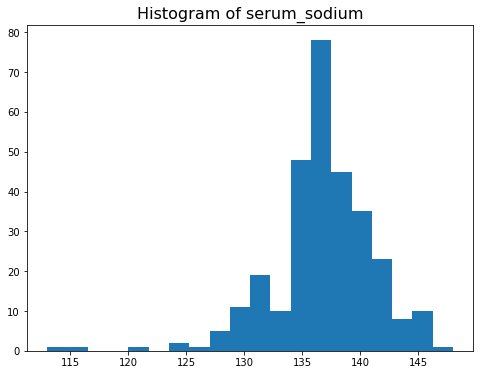

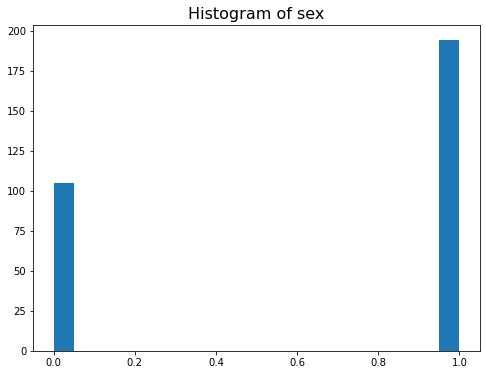

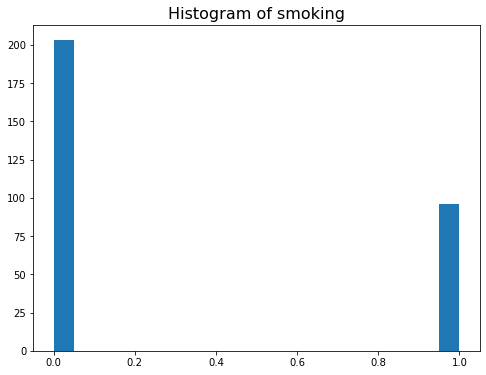

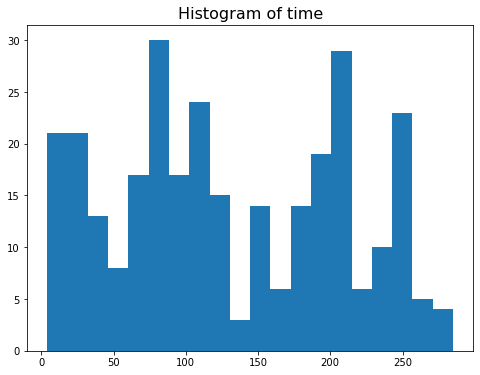

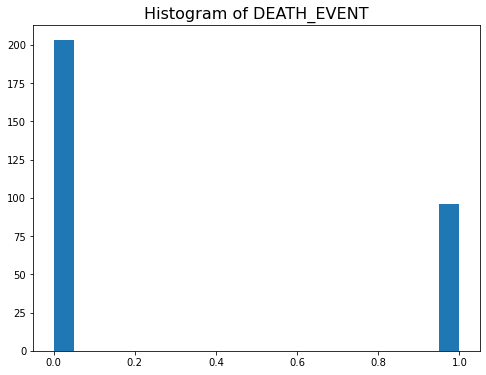

In [13]:
for c in heart_failure_df.columns:
    plt.figure(figsize=(8,6))
    plt.title('Histogram of '+c,fontsize=16)
    plt.hist(heart_failure_df[c], bins=20)
    plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Boxplot of Ejection-Fraction')]

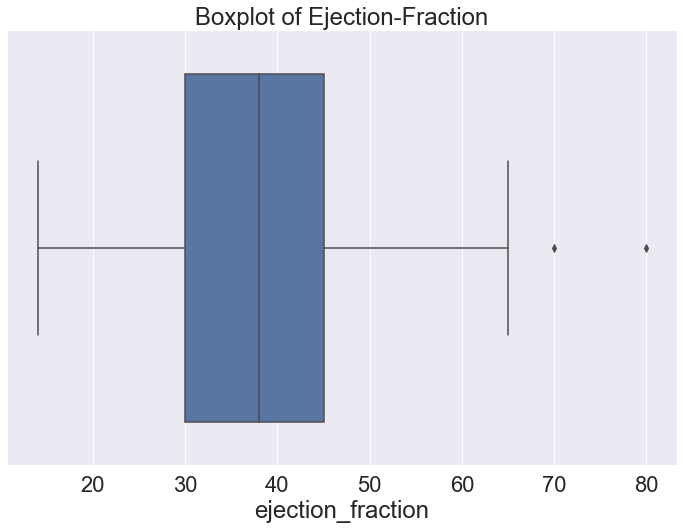

In [14]:
sns.set(font_scale=2)
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(heart_failure_df.ejection_fraction).set(title='Boxplot of Ejection-Fraction')

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Boxplot of Age')]

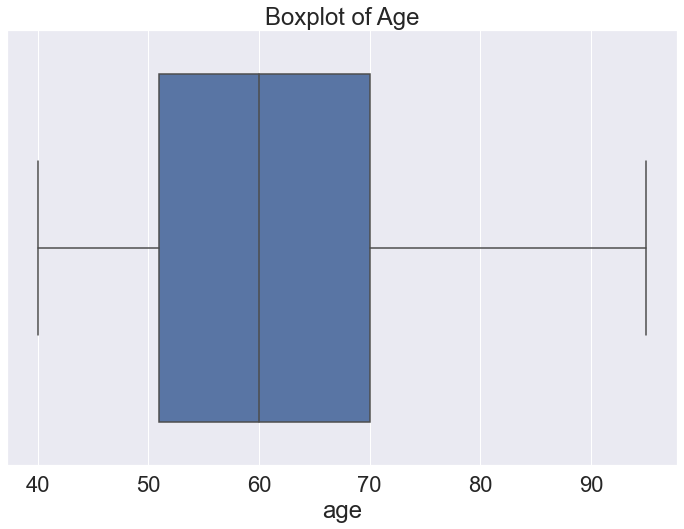

In [15]:
sns.set(font_scale=2)
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(heart_failure_df.age).set(title='Boxplot of Age')

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Platelets')]

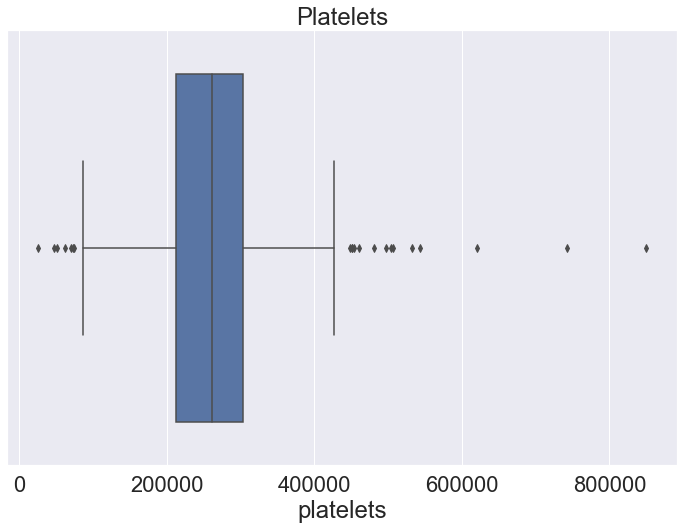

In [16]:
sns.set(font_scale=2)
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(heart_failure_df.platelets).set(title='Platelets')

Text(0.5, 1.0, 'Correlation Matrix of Heart Failure')

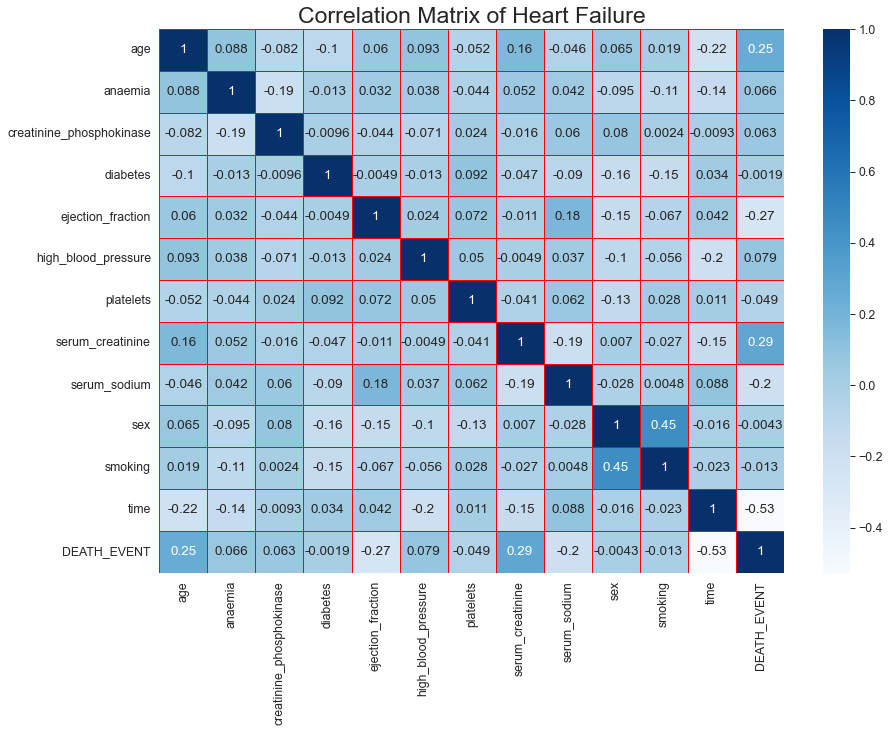

In [17]:
sns.set(font_scale=2)
heart_failure_df_mx = heart_failure_df.corr()
plt.figure(figsize=(14,10))
sns.set_context('paper', font_scale=1.4)
sns.heatmap(heart_failure_df_mx, annot=True, cmap='Blues', linecolor='red', linewidth=1)
plt.title('Correlation Matrix of Heart Failure', fontsize=23)

Text(0.5, 1.0, 'Compare Survival to Ejection Fraction by Gender')

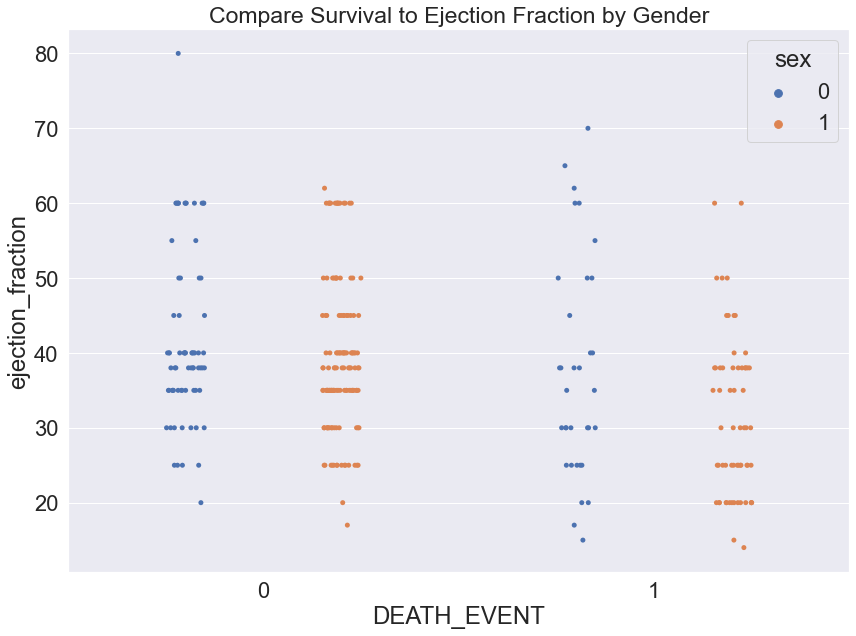

In [18]:
sns.set(font_scale=2)
plt.figure(figsize=(14,10))
sns.stripplot(x='DEATH_EVENT',y='ejection_fraction', data=heart_failure_df, jitter=True, hue='sex', dodge=True)
plt.title('Compare Survival to Ejection Fraction by Gender', fontsize=23)

#   Insights Gained from Graphical Analysis.

'''
The correlation matrix clearly displays the fact that while the features are most certainly
present and and indicative of HF, they are not indicators of imminent death from HF. The histograms
describe sickly patients, but not patients who die from these features. Ejection fraction includes
a few outliers who are capable of pumping efficiently, but most patients exhibit poor ejection fractions.
Aside from the few outliers in ejection fraction among men, gender does not affect the lower ejection fraction's
correlation with death.
'''

#  Milestone 2. Data Preparation

In [19]:
# Check for nulls
heart_failure_df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

#  There are no null values in the dataset.

In [20]:
# Check for duplicate rows
duplicates = heart_failure_df[heart_failure_df.duplicated()]
duplicates

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT


#  There are no duplicate rows in the df.

#  Inspect partial correlations...controlling for all other variables.

In [21]:
import pingouin as pg

heart_failure_df.pcorr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.041986,-0.086666,-0.081870,0.130620,0.060839,-0.028083,0.073435,-0.007119,0.083623,-0.012169,-0.071300,0.179649
anaemia,0.041986,1.000000,-0.189121,-0.015324,0.002377,-0.018240,-0.041599,0.030727,0.072282,-0.047086,-0.081882,-0.122315,-0.003685
creatinine_phosphokinase,-0.086666,-0.189121,1.000000,-0.011443,-0.007946,-0.066551,0.029934,-0.013460,0.087074,0.082868,-0.058736,-0.016099,0.089803
diabetes,-0.081870,-0.015324,-0.011443,1.000000,-0.001447,-0.020273,0.085410,-0.056038,-0.102833,-0.087922,-0.097384,0.018121,0.025839
ejection_fraction,0.130620,0.002377,-0.007946,-0.001447,1.000000,-0.006525,0.042637,0.084702,0.135175,-0.137597,-0.010736,-0.109942,-0.300758
high_blood_pressure,0.060839,-0.018240,-0.066551,-0.020273,-0.006525,1.000000,0.042860,-0.028762,0.046192,-0.083378,-0.025277,-0.176170,-0.018515
platelets,-0.028083,-0.041599,0.029934,0.085410,0.042637,0.042860,1.000000,-0.009791,0.046878,-0.134426,0.098307,-0.015772,-0.022409
serum_creatinine,0.073435,0.030727,-0.013460,-0.056038,0.084702,-0.028762,-0.009791,1.000000,-0.153023,0.016552,-0.030280,0.022867,0.231105
serum_sodium,-0.007119,0.072282,0.087074,-0.102833,0.135175,0.046192,0.046878,-0.153023,1.000000,-0.014054,0.009224,0.018507,-0.089085
sex,0.083623,-0.047086,0.082868,-0.087922,-0.137597,-0.083378,-0.134426,0.016552,-0.014054,1.000000,0.426905,-0.037802,-0.073519


#  Follow-up time has the greatest correlation, negative, to the death event. Ejection_fraction is next at -0.30. The less the ejection fraction, the less likely the death event to occur. The next in correlation is serum_creatinine with a positive correlation of 0.23. I will drop the time variable because follow-up time is not informative for how doctors should provide optimal care and information to HF patients about their chances of survival, based on these tests.

In [22]:
heart_failure_df = heart_failure_df.drop(['time'], axis=1)

In [23]:
heart_failure_df.shape

(299, 12)

In [24]:
heart_failure_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 28.2 KB


#  Calculate kendall's tau for dataset

In [25]:
kendall_tau = heart_failure_df.corr(method='kendall')
kendall_tau

C:\Users\Admin\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
C:\Users\Admin\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
age,1.000000,0.060190,-0.063180,-0.075029,0.051284,0.088488,-0.037190,0.190089,-0.073368,0.048362,0.025227,0.182536
anaemia,0.060190,1.000000,-0.178712,-0.012729,0.017519,0.038182,-0.029259,-0.013774,0.052115,-0.094769,-0.107290,0.066270
creatinine_phosphokinase,-0.063180,-0.178712,1.000000,0.034985,-0.047061,-0.066753,0.039742,-0.035139,0.013129,0.010997,-0.025098,0.019529
diabetes,-0.075029,-0.012729,0.034985,1.000000,-0.010242,-0.012732,0.060665,0.001637,-0.047007,-0.157730,-0.147173,-0.001943
ejection_fraction,0.051284,0.017519,-0.047061,-0.010242,1.000000,0.015435,0.037870,-0.129745,0.118261,-0.112508,-0.061718,-0.246766
high_blood_pressure,0.088488,0.038182,-0.066753,-0.012732,0.015435,1.000000,0.056715,-0.075944,0.016364,-0.104615,-0.055711,0.079351
platelets,-0.037190,-0.029259,0.039742,0.060665,0.037870,0.056715,1.000000,-0.035681,0.034561,-0.112929,0.003922,-0.037962
serum_creatinine,0.190089,-0.013774,-0.035139,0.001637,-0.129745,-0.075944,-0.035681,1.000000,-0.223007,0.044186,-0.014435,0.313822
serum_sodium,-0.073368,0.052115,0.013129,-0.047007,0.118261,0.016364,0.034561,-0.223007,1.000000,-0.065421,0.007074,-0.178090
sex,0.048362,-0.094769,0.010997,-0.157730,-0.112508,-0.104615,-0.112929,0.044186,-0.065421,1.000000,0.445892,-0.004316


#  kendall's tau shows a greater correlation between serum_creatinine and DEATH_EVENT than ejection_fraction and DEATH_EVENT.

#  Create logistic regression on entire df, and on ejection fraction for baseline idea of model quality. Will use standard scaler for simplicity, but anticipate trying robust scaler.

In [26]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
standardized = scaler.fit_transform(heart_failure_df)

#  I fit-transformed the entire df together, including the test set. If i were normalizing the data, I would only fit-transform the train set to prevent leakage. I do not yet have clarity as to whether standardizing the range will potentially cause a problem.

In [27]:
standardized

array([[ 1.19294523e+00, -8.71104775e-01,  1.65728387e-04, ...,
         7.35688190e-01, -6.87681906e-01,  1.45416070e+00],
       [-4.91279276e-01, -8.71104775e-01,  7.51463953e+00, ...,
         7.35688190e-01, -6.87681906e-01,  1.45416070e+00],
       [ 3.50832977e-01, -8.71104775e-01, -4.49938761e-01, ...,
         7.35688190e-01,  1.45416070e+00,  1.45416070e+00],
       ...,
       [-1.33339153e+00, -8.71104775e-01,  1.52597865e+00, ...,
        -1.35927151e+00, -6.87681906e-01, -6.87681906e-01],
       [-1.33339153e+00, -8.71104775e-01,  1.89039811e+00, ...,
         7.35688190e-01,  1.45416070e+00, -6.87681906e-01],
       [-9.12335403e-01, -8.71104775e-01, -3.98321274e-01, ...,
         7.35688190e-01,  1.45416070e+00, -6.87681906e-01]])

In [28]:
print('Mean:', round(standardized.mean()))

Mean: 0


In [29]:
print('Standard deviation:', standardized.std())

Standard deviation: 1.0


In [30]:
heart_failure_df_standardized = pd.DataFrame(standardized, columns = heart_failure_df.columns)
heart_failure_df_standardized.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,1.192945,-0.871105,0.000166,-0.847579,-1.530560,1.359272,1.681648e-02,0.490057,-1.504036,0.735688,-0.687682,1.454161
1,-0.491279,-0.871105,7.514640,-0.847579,-0.007077,-0.735688,7.535660e-09,-0.284552,-0.141976,0.735688,-0.687682,1.454161
2,0.350833,-0.871105,-0.449939,-0.847579,-1.530560,-0.735688,-1.038073e+00,-0.090900,-1.731046,0.735688,1.454161,1.454161
3,-0.912335,1.147968,-0.486071,-0.847579,-1.530560,-0.735688,-5.464741e-01,0.490057,0.085034,0.735688,-0.687682,1.454161
4,0.350833,1.147968,-0.435486,1.179830,-1.530560,-0.735688,6.517986e-01,1.264666,-4.682176,-1.359272,-0.687682,1.454161


#  Create simple logistic Regression between ejection_fraction and DEATH_EVENT.

In [31]:
heart_failure_df_standardized['DEATH_EVENT'].value_counts()

-0.687682    203
 1.454161     96
Name: DEATH_EVENT, dtype: int64

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [33]:
# Had to use original df for target because standardized was interpreted as continuous and logreg would not work
# Logistic regression using only ejection fraction
X = heart_failure_df_standardized['ejection_fraction']
y = heart_failure_df['DEATH_EVENT']

In [34]:
X_train, X_test,y_train, y_test = train_test_split(X,y ,
                                   random_state=104, 
                                   test_size=0.15, 
                                   shuffle=True)

In [35]:
logreg =  LogisticRegression(solver='liblinear') 

In [36]:
import numpy as np
X_train = np.array(X_train).reshape(-1,1)
logreg.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [37]:
X_test = np.array(X_test).reshape(-1,1)
y_pred = logreg.predict(X_test)

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print ("Confusion Matrix : \n", cm)


Confusion Matrix : 
 [[26  0]
 [15  4]]


In [39]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.6666666666666666


In [40]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      1.00      0.78        26
           1       1.00      0.21      0.35        19

    accuracy                           0.67        45
   macro avg       0.82      0.61      0.56        45
weighted avg       0.79      0.67      0.60        45



In [41]:
# Calculate MCC on logistic regression of ejection fraction and DEATH_EVENT
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_pred)

0.36538266644665324

#  Create roc curve and show auc.

In [42]:
from sklearn.metrics import roc_curve, auc

In [43]:
fpr1, tpr1, thresholds = roc_curve(y_test, y_pred, pos_label=1)
roc_auc1 = auc(fpr1, tpr1)

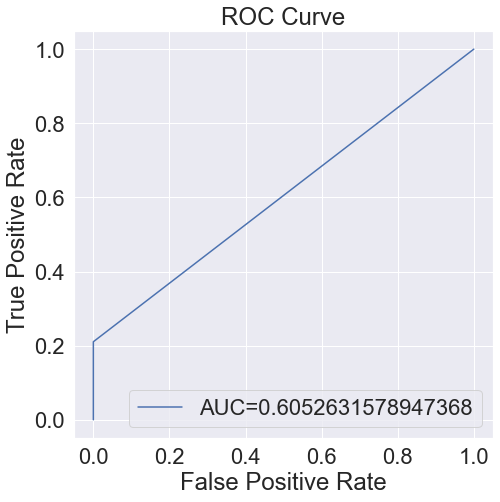

In [44]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(7.5, 7.5))
plt.plot(fpr1, tpr1, label='AUC='+str(roc_auc1))
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

#  The tradeoff to keep the false positives low requires to accept more false negatives.

In [45]:
y_prob = logreg.predict_proba(X_test)

In [46]:
# show the inputs and predicted outputs
for i in range(len(X_test)):
    print("X=%s, Predicted=%s" % (X_test[i], y_prob[i]))

X=[-0.00707675], Predicted=[0.70634203 0.29365797]
X=[-0.26099055], Predicted=[0.67165181 0.32834819]
X=[0.16219911], Predicted=[0.72823698 0.27176302]
X=[-0.26099055], Predicted=[0.67165181 0.32834819]
X=[-0.68418021], Predicted=[0.60960088 0.39039912]
X=[-0.68418021], Predicted=[0.60960088 0.39039912]
X=[-0.68418021], Predicted=[0.60960088 0.39039912]
X=[-0.00707675], Predicted=[0.70634203 0.29365797]
X=[1.85495776], Predicted=[0.88753627 0.11246373]
X=[1.00857844], Predicted=[0.82138472 0.17861528]
X=[-0.00707675], Predicted=[0.70634203 0.29365797]
X=[-1.10736987], Predicted=[0.54378858 0.45621142]
X=[-0.26099055], Predicted=[0.67165181 0.32834819]
X=[0.16219911], Predicted=[0.72823698 0.27176302]
X=[1.00857844], Predicted=[0.82138472 0.17861528]
X=[-0.00707675], Predicted=[0.70634203 0.29365797]
X=[-1.10736987], Predicted=[0.54378858 0.45621142]
X=[-0.26099055], Predicted=[0.67165181 0.32834819]
X=[-1.10736987], Predicted=[0.54378858 0.45621142]
X=[-0.26099055], Predicted=[0.671651

In [47]:
print("X=%s, Predicted=%s" % (X_test[0], y_prob[0]))

X=[-0.00707675], Predicted=[0.70634203 0.29365797]


#  Create logit model of all features.

In [48]:
X = heart_failure_df_standardized.drop(['DEATH_EVENT'], axis=1)
y = heart_failure_df['DEATH_EVENT']

In [49]:
X_train, X_test,y_train, y_test = train_test_split(X,y ,
                                   random_state=104, 
                                   test_size=0.15, 
                                   shuffle=True)

In [50]:
logreg.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [51]:
y_pred = logreg.predict(X_test)

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print ("Confusion Matrix : \n", cm)


Confusion Matrix : 
 [[21  5]
 [11  8]]


In [53]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.6444444444444445


In [54]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.81      0.72        26
           1       0.62      0.42      0.50        19

    accuracy                           0.64        45
   macro avg       0.64      0.61      0.61        45
weighted avg       0.64      0.64      0.63        45



In [55]:
# Calculate MCC on logistic regression of ejection fraction and DEATH_EVENT
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_pred)

0.2492690185324373

#  Create logit model of two most highly independent, correlated features to target

In [56]:
X = heart_failure_df_standardized[['ejection_fraction', 'serum_creatinine']]
y = heart_failure_df['DEATH_EVENT']

In [57]:
X_train, X_test,y_train, y_test = train_test_split(X,y ,
                                   random_state=104, 
                                   test_size=0.15, 
                                   shuffle=True)

In [58]:
logreg.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [59]:
y_pred = logreg.predict(X_test)

In [60]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[23  3]
 [13  6]]


In [61]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.6444444444444445


In [62]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.88      0.74        26
           1       0.67      0.32      0.43        19

    accuracy                           0.64        45
   macro avg       0.65      0.60      0.59        45
weighted avg       0.65      0.64      0.61        45



In [63]:
# Calculate MCC on logistic regression of ejection fraction and DEATH_EVENT
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_pred)

0.24745669886621616

#  Create logit model of three most highly correlated features with target

In [64]:
X = heart_failure_df_standardized[['ejection_fraction', 'serum_creatinine', 'age']]
y = heart_failure_df['DEATH_EVENT']

In [65]:
X_train, X_test,y_train, y_test = train_test_split(X,y ,
                                   random_state=104, 
                                   test_size=0.15, 
                                   shuffle=True)

In [66]:
logreg.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [67]:
y_pred = logreg.predict(X_test)

In [68]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[21  5]
 [10  9]]


In [69]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.6666666666666666


In [70]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.81      0.74        26
           1       0.64      0.47      0.55        19

    accuracy                           0.67        45
   macro avg       0.66      0.64      0.64        45
weighted avg       0.66      0.67      0.66        45



In [71]:
# Calculate MCC on logistic regression of ejection fraction and DEATH_EVENT
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_pred)

0.30019707824846326

In [72]:
logreg.predict_proba(X_test)

array([[0.37888672, 0.62111328],
       [0.00506488, 0.99493512],
       [0.69755328, 0.30244672],
       [0.84515744, 0.15484256],
       [0.33138463, 0.66861537],
       [0.76498418, 0.23501582],
       [0.11897624, 0.88102376],
       [0.80448073, 0.19551927],
       [0.92272404, 0.07727596],
       [0.77800315, 0.22199685],
       [0.85531861, 0.14468139],
       [0.4121838 , 0.5878162 ],
       [0.85225178, 0.14774822],
       [0.93301618, 0.06698382],
       [0.59098994, 0.40901006],
       [0.80091947, 0.19908053],
       [0.574939  , 0.425061  ],
       [0.56381203, 0.43618797],
       [0.290643  , 0.709357  ],
       [0.8738335 , 0.1261665 ],
       [0.55080467, 0.44919533],
       [0.81423931, 0.18576069],
       [0.62566764, 0.37433236],
       [0.21405924, 0.78594076],
       [0.61777806, 0.38222194],
       [0.71827199, 0.28172801],
       [0.87143854, 0.12856146],
       [0.6365939 , 0.3634061 ],
       [0.77453017, 0.22546983],
       [0.86485278, 0.13514722],
       [0.

In [73]:
fpr1, tpr1, thresholds = roc_curve(y_test, y_pred, pos_label=1)
roc_auc1 = auc(fpr1, tpr1)

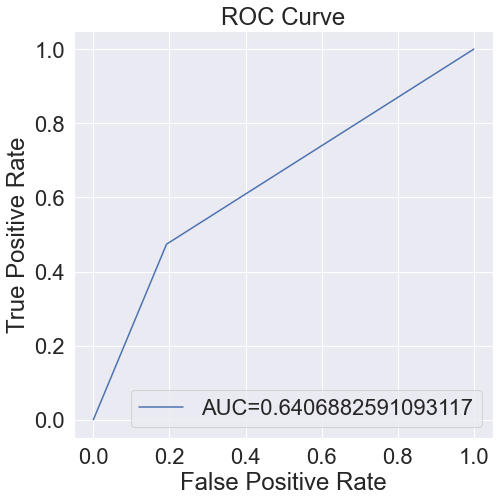

In [74]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
plt.plot(fpr1, tpr1, label='AUC='+str(roc_auc1))
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

#  Perform PCA on scaled data

In [75]:
X = heart_failure_df_standardized.drop(['DEATH_EVENT'], axis=1)
y = heart_failure_df['DEATH_EVENT']

In [76]:
X_train, X_test,y_train, y_test = train_test_split(X,y ,
                                   random_state=104, 
                                   test_size=0.15, 
                                   shuffle=True)

In [77]:
X_train.shape, X_test.shape

((254, 11), (45, 11))

In [78]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.90, whiten=True)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

In [79]:
explained_variance

array([0.1584886 , 0.12959911, 0.12035696, 0.09628866, 0.09197686,
       0.08523367, 0.07761896, 0.07219013, 0.06361836, 0.05548913])

#  Create logit model from PCA which reduced by one feature

In [80]:
X_train.shape, X_test.shape

((254, 10), (45, 10))

In [81]:
logreg.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [82]:
y_pred = logreg.predict(X_test)

In [83]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[23  3]
 [12  7]]


In [84]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.6666666666666666


In [85]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.88      0.75        26
           1       0.70      0.37      0.48        19

    accuracy                           0.67        45
   macro avg       0.68      0.63      0.62        45
weighted avg       0.68      0.67      0.64        45



In [86]:
# Calculate MCC on logistic regression of ejection fraction and DEATH_EVENT
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_pred)

0.3006162939024261

In [87]:
fpr1, tpr1, thresholds = roc_curve(y_test, y_pred, pos_label=1)
roc_auc1 = auc(fpr1, tpr1)

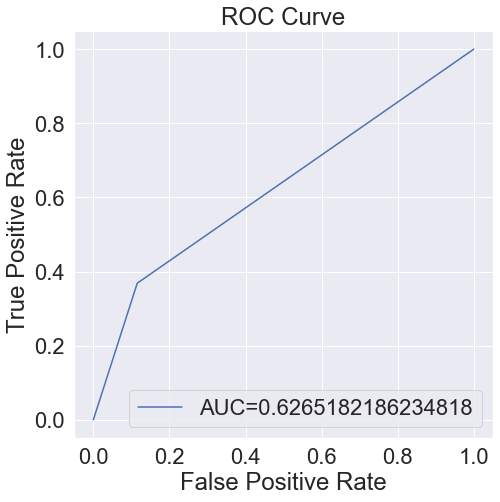

In [88]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
plt.plot(fpr1, tpr1, label='AUC='+str(roc_auc1))
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

#  Use RFE with cross-validation for a logistic regression

In [89]:
from sklearn.feature_selection import RFECV

In [90]:
logreg =  LogisticRegression(solver='liblinear') 

In [91]:
X = heart_failure_df_standardized.drop(['DEATH_EVENT'], axis=1)
y = heart_failure_df['DEATH_EVENT']

In [92]:
selector = RFECV(logreg, cv=5)
selector = selector.fit(X, y)
  
# Print the optimal number of features
print("Optimal number of features: %d" % selector.n_features_)
  
# Print the selected features
print("Selected features: %s" % selector.support_)

Optimal number of features: 3
Selected features: [ True False False False  True False False  True False False False]


In [93]:
selector.transform(X)

array([[ 1.19294523e+00, -1.53055953e+00,  4.90056987e-01],
       [-4.91279276e-01, -7.07675018e-03, -2.84552352e-01],
       [ 3.50832977e-01, -1.53055953e+00, -9.09000174e-02],
       [-9.12335403e-01, -1.53055953e+00,  4.90056987e-01],
       [ 3.50832977e-01, -1.53055953e+00,  1.26466633e+00],
       [ 2.45611361e+00,  1.62199114e-01,  6.83709322e-01],
       [ 1.19294523e+00, -1.95374919e+00, -1.87726185e-01],
       [-7.02231493e-02,  1.85495776e+00, -2.84552352e-01],
       [ 3.50832977e-01,  2.27814742e+00,  1.02752318e-01],
       [ 1.61400136e+00, -2.60990546e-01,  7.75201955e+00],
       [ 1.19294523e+00, -7.07675018e-03,  2.52340650e+00],
       [ 9.81993013e-02, -1.10736987e+00, -4.78204687e-01],
       [-1.33339153e+00, -6.84180207e-01, -2.84552352e-01],
       [-9.12335403e-01, -7.07675018e-03, -2.84552352e-01],
       [-9.96546628e-01, -6.84180207e-01, -3.81378520e-01],
       [ 1.78242381e+00,  1.00857844e+00, -9.09000174e-02],
       [ 2.20347993e+00, -7.07675018e-03

In [94]:
selected_features = X.columns[(selector.support_)]
selected_features

Index(['age', 'ejection_fraction', 'serum_creatinine'], dtype='object')

 # The logistic regression I previously performed produced an accuracy of 67% and a recall of 0.47. This has been among the best models, and it is not nearly good enough.

#  Use Min/Max Scaler to assure positive inputs to compute chi2

In [95]:
X = heart_failure_df.drop(['DEATH_EVENT'], axis=1)
y = heart_failure_df['DEATH_EVENT']

In [96]:
X_train, X_test,y_train, y_test = train_test_split(X,y ,
                                   random_state=104, 
                                   test_size=0.15, 
                                   shuffle=True)

In [97]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [98]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [99]:
from sklearn.feature_selection import chi2, f_classif
from sklearn.feature_selection import SelectKBest

In [100]:
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X_train, y_train)
fit.scores_

array([2.22229185e+00, 4.65771517e-01, 5.63774792e-02, 9.43366561e-05,
       1.56711897e+00, 2.29127787e-01, 5.43019209e-02, 2.39866161e+00,
       3.05826704e-01, 4.18403578e-02, 1.68892154e-01])

#  Use f-classif to calculate ANOVA F-value statistic with each feature and target vector

In [101]:

# configure to select all features
fs = SelectKBest(score_func=f_classif, k='all')
# learn relationship from training data
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)

Feature 0: 19.981820
Feature 1: 0.806507
Feature 2: 0.298086
Feature 3: 0.000167
Feature 4: 18.967792
Feature 5: 0.356926
Feature 6: 1.070859
Feature 7: 22.375944
Feature 8: 13.040296
Feature 9: 0.113425
Feature 10: 0.240686


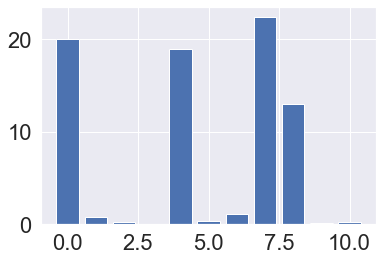

In [102]:

# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
import matplotlib.pyplot as plt
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

#  The highest value is age, followed by serum-creatinine, ejection fraction, and serum-sodium

#  Try RandomForest

In [103]:
from sklearn.ensemble import RandomForestClassifier

In [104]:
ran_for_clf = RandomForestClassifier(n_estimators=100,
                             oob_score=True,
                             random_state=0)
ran_for_clf.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=0)

In [105]:
y_pred = ran_for_clf.predict(X_test)

In [106]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.6444444444444445


In [107]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[20  6]
 [10  9]]


In [108]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.77      0.71        26
           1       0.60      0.47      0.53        19

    accuracy                           0.64        45
   macro avg       0.63      0.62      0.62        45
weighted avg       0.64      0.64      0.64        45



In [109]:
oob_error = 1 - ran_for_clf.oob_score_

In [110]:
print(f'OOB error: {oob_error:.3f}')

OOB error: 0.244


In [111]:
matthews_corrcoef(y_test, y_pred)

0.2545139051903111

In [112]:
fpr1, tpr1, thresholds = roc_curve(y_test, y_pred, pos_label=1)
roc_auc1 = auc(fpr1, tpr1)

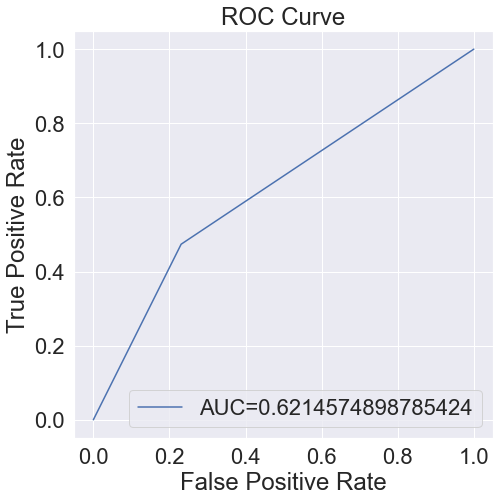

In [113]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
plt.plot(fpr1, tpr1, label='AUC='+str(roc_auc1))
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

#  In all of these baseline models the recall on positive(1) death event has not surpassed 0.45...clearly not good enough. Changing the Train/Test split to 85% Train and 15% Test increased the accuracy slightly and sometimes the recall on 1. It may be appropriate to run the model many times to get a better idea on how it performs because of the small sample size. Testing on 15% of such a small dataset is fearful.

#  Week 10: Term Project Milestone 3

In [114]:
# ! pip install xgboost

#  Try Gradient Boosting Classifier

In [115]:
from sklearn.ensemble import GradientBoostingClassifier

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [117]:
X = heart_failure_df.drop(['DEATH_EVENT'], axis=1)
y = heart_failure_df['DEATH_EVENT']

In [118]:
X_train, X_test,y_train, y_test = train_test_split(X,y ,
                                   random_state=104, 
                                   test_size=0.15, 
                                   shuffle=True)

In [119]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

In [120]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [121]:
gbc = GradientBoostingClassifier()
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

In [122]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(gbc,parameters,cv=5)

In [123]:
cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [5, 50, 250, 500]})

In [124]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [125]:
display(cv)

Best parameters are: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}


0.697 + or -0.009 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.697 + or -0.009 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.752 + or -0.036 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.736 + or -0.031 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.697 + or -0.009 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.724 + or -0.035 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.76 + or -0.032 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.764 + or -0.034 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.697 + or -0.009 for the {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.725 + or -0.057 for the {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.76 + or -0.06 for the {'learning_rate': 0.01, 'max_dep

In [126]:
y_pred = cv.predict(X_test)

In [127]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.6888888888888889


In [128]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[21  5]
 [ 9 10]]


In [129]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.81      0.75        26
           1       0.67      0.53      0.59        19

    accuracy                           0.69        45
   macro avg       0.68      0.67      0.67        45
weighted avg       0.69      0.69      0.68        45



In [130]:
matthews_corrcoef(y_test, y_pred)

0.3499566196366778

In [131]:
fpr1, tpr1, thresholds = roc_curve(y_test, y_pred, pos_label=1)
roc_auc1 = auc(fpr1, tpr1)

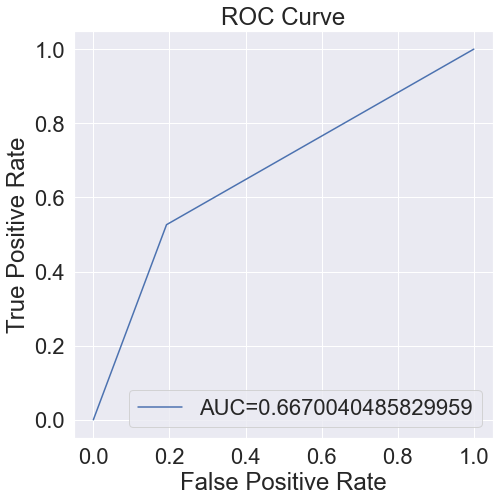

In [132]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
plt.plot(fpr1, tpr1, label='AUC='+str(roc_auc1))
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

#  Try Gradient Boosting Model using Three Best Features

In [133]:
X = heart_failure_df[['age', 'ejection_fraction', 'serum_creatinine']]
y = heart_failure_df['DEATH_EVENT']

In [134]:
X_train, X_test,y_train, y_test = train_test_split(X,y ,
                                   random_state=104, 
                                   test_size=0.15, 
                                   shuffle=True)

In [135]:
scaler = preprocessing.StandardScaler()

In [136]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [137]:
gbc = GradientBoostingClassifier()
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

In [138]:
cv = GridSearchCV(gbc,parameters,cv=5)

In [139]:
cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [5, 50, 250, 500]})

In [140]:
y_pred = cv.predict(X_test)

In [141]:
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.6666666666666666


In [142]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[20  6]
 [ 9 10]]


In [143]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.77      0.73        26
           1       0.62      0.53      0.57        19

    accuracy                           0.67        45
   macro avg       0.66      0.65      0.65        45
weighted avg       0.66      0.67      0.66        45



In [144]:
fpr1, tpr1, thresholds = roc_curve(y_test, y_pred, pos_label=1)
roc_auc1 = auc(fpr1, tpr1)

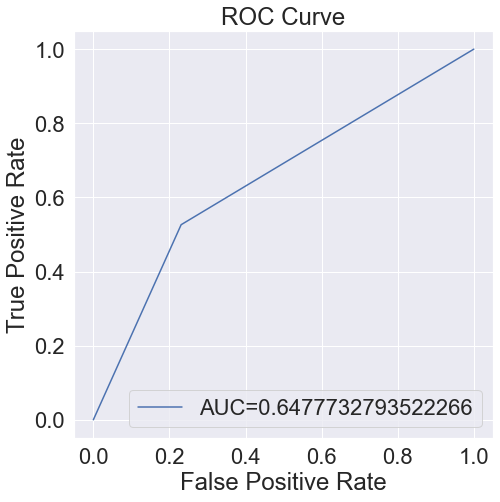

In [145]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
plt.plot(fpr1, tpr1, label='AUC='+str(roc_auc1))
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

#  Using three best features did not improve the model.

#  Try XGBClassifier

In [146]:
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

# fit model on training data
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)



In [147]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.7111111111111111


In [148]:
matthews_corrcoef(y_test, y_pred)

0.41248236375008607

In [149]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[19  7]
 [ 6 13]]


In [150]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.73      0.75        26
           1       0.65      0.68      0.67        19

    accuracy                           0.71        45
   macro avg       0.71      0.71      0.71        45
weighted avg       0.71      0.71      0.71        45



#  Try XGBClassifier on top three features

In [151]:
X = heart_failure_df[['age', 'ejection_fraction', 'serum_creatinine']]
y = heart_failure_df['DEATH_EVENT']

In [152]:
X_train, X_test,y_train, y_test = train_test_split(X,y ,
                                   random_state=104, 
                                   test_size=0.15, 
                                   shuffle=True)

In [153]:
scaler = preprocessing.StandardScaler()

In [154]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [155]:
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [156]:
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.7111111111111111


In [157]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[19  7]
 [ 6 13]]


In [158]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.73      0.75        26
           1       0.65      0.68      0.67        19

    accuracy                           0.71        45
   macro avg       0.71      0.71      0.71        45
weighted avg       0.71      0.71      0.71        45



In [159]:
fpr1, tpr1, thresholds = roc_curve(y_test, y_pred, pos_label=1)
roc_auc1 = auc(fpr1, tpr1)

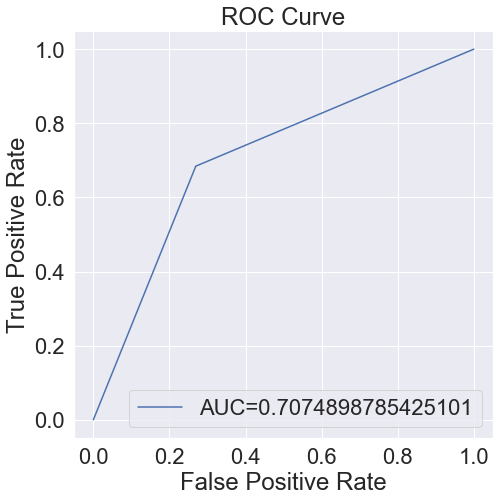

In [160]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
plt.plot(fpr1, tpr1, label='AUC='+str(roc_auc1))
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [161]:
matthews_corrcoef(y_test, y_pred)

0.41248236375008607

#  The XGBClassifier model has produced the highest MCC(0.41) so far.

In [162]:
# ! pip install mlxtend

#  Look at One Rule Classifier...not necessarily expecting high accuracy

In [163]:
from mlxtend.classifier import OneRClassifier
oner = OneRClassifier()

oner.fit(X_train, y_train);

In [164]:
y_pred = oner.predict(X_test)

In [165]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.6222222222222222


In [166]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[23  3]
 [14  5]]


In [167]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.88      0.73        26
           1       0.62      0.26      0.37        19

    accuracy                           0.62        45
   macro avg       0.62      0.57      0.55        45
weighted avg       0.62      0.62      0.58        45



In [168]:
matthews_corrcoef(y_test, y_pred)

0.19090334147466106

In [169]:
fpr1, tpr1, thresholds = roc_curve(y_test, y_pred, pos_label=1)
roc_auc1 = auc(fpr1, tpr1)

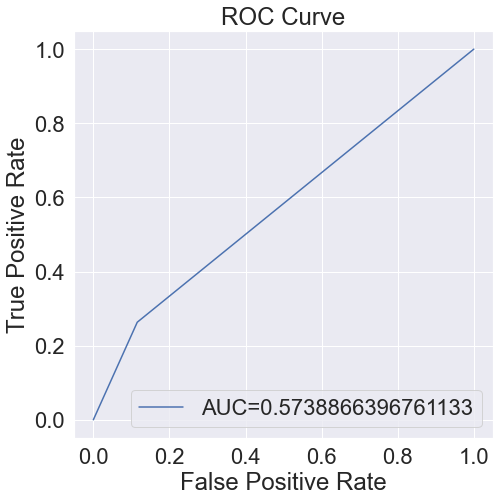

In [170]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
plt.plot(fpr1, tpr1, label='AUC='+str(roc_auc1))
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

#  LinearDiscriminantAnalysis

In [171]:
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# define model
model = LinearDiscriminantAnalysis(solver='lsqr')
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['shrinkage'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train, y_train)
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Mean Accuracy: 0.770
Config: {'shrinkage': 0.0}


In [172]:
y_pred = search.predict(X_test)

In [173]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.6888888888888889


In [174]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[21  5]
 [ 9 10]]


In [175]:
fpr1, tpr1, thresholds = roc_curve(y_test, y_pred, pos_label=1)
roc_auc1 = auc(fpr1, tpr1)

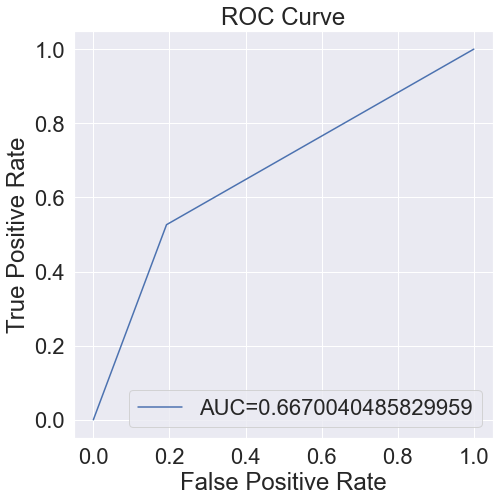

In [176]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
plt.plot(fpr1, tpr1, label='AUC='+str(roc_auc1))
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [177]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.81      0.75        26
           1       0.67      0.53      0.59        19

    accuracy                           0.69        45
   macro avg       0.68      0.67      0.67        45
weighted avg       0.69      0.69      0.68        45



In [178]:
matthews_corrcoef(y_test, y_pred)

0.3499566196366778

#  Try LinearDiscriminantAnalysis on top three features

In [179]:
X = heart_failure_df[['age', 'ejection_fraction', 'serum_creatinine']]
y = heart_failure_df['DEATH_EVENT']

In [180]:
X_train, X_test,y_train, y_test = train_test_split(X,y ,
                                   random_state=104, 
                                   test_size=0.15, 
                                   shuffle=True)

In [181]:
scaler = preprocessing.StandardScaler()

In [182]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [183]:
model = LinearDiscriminantAnalysis(solver='lsqr')
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['shrinkage'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train, y_train)
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Mean Accuracy: 0.770
Config: {'shrinkage': 0.0}


In [184]:
y_pred = search.predict(X_test)

In [185]:
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.6888888888888889


In [186]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[21  5]
 [ 9 10]]


In [187]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.81      0.75        26
           1       0.67      0.53      0.59        19

    accuracy                           0.69        45
   macro avg       0.68      0.67      0.67        45
weighted avg       0.69      0.69      0.68        45



In [188]:
matthews_corrcoef(y_test, y_pred)

0.3499566196366778

In [189]:
fpr1, tpr1, thresholds = roc_curve(y_test, y_pred, pos_label=1)
roc_auc1 = auc(fpr1, tpr1)

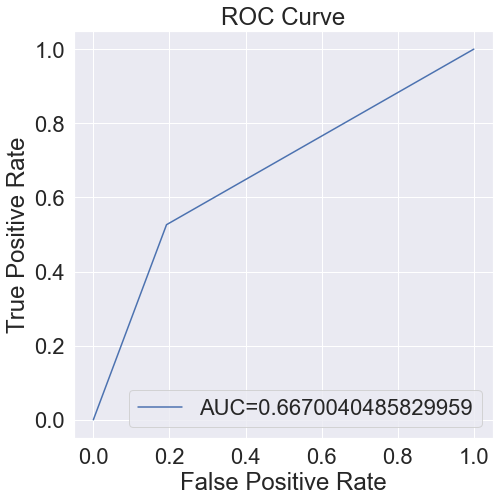

In [190]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
plt.plot(fpr1, tpr1, label='AUC='+str(roc_auc1))
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

#  Try Support Vector Machine

In [191]:
from sklearn.svm import SVC  
import matplotlib.pyplot as plt
%matplotlib inline

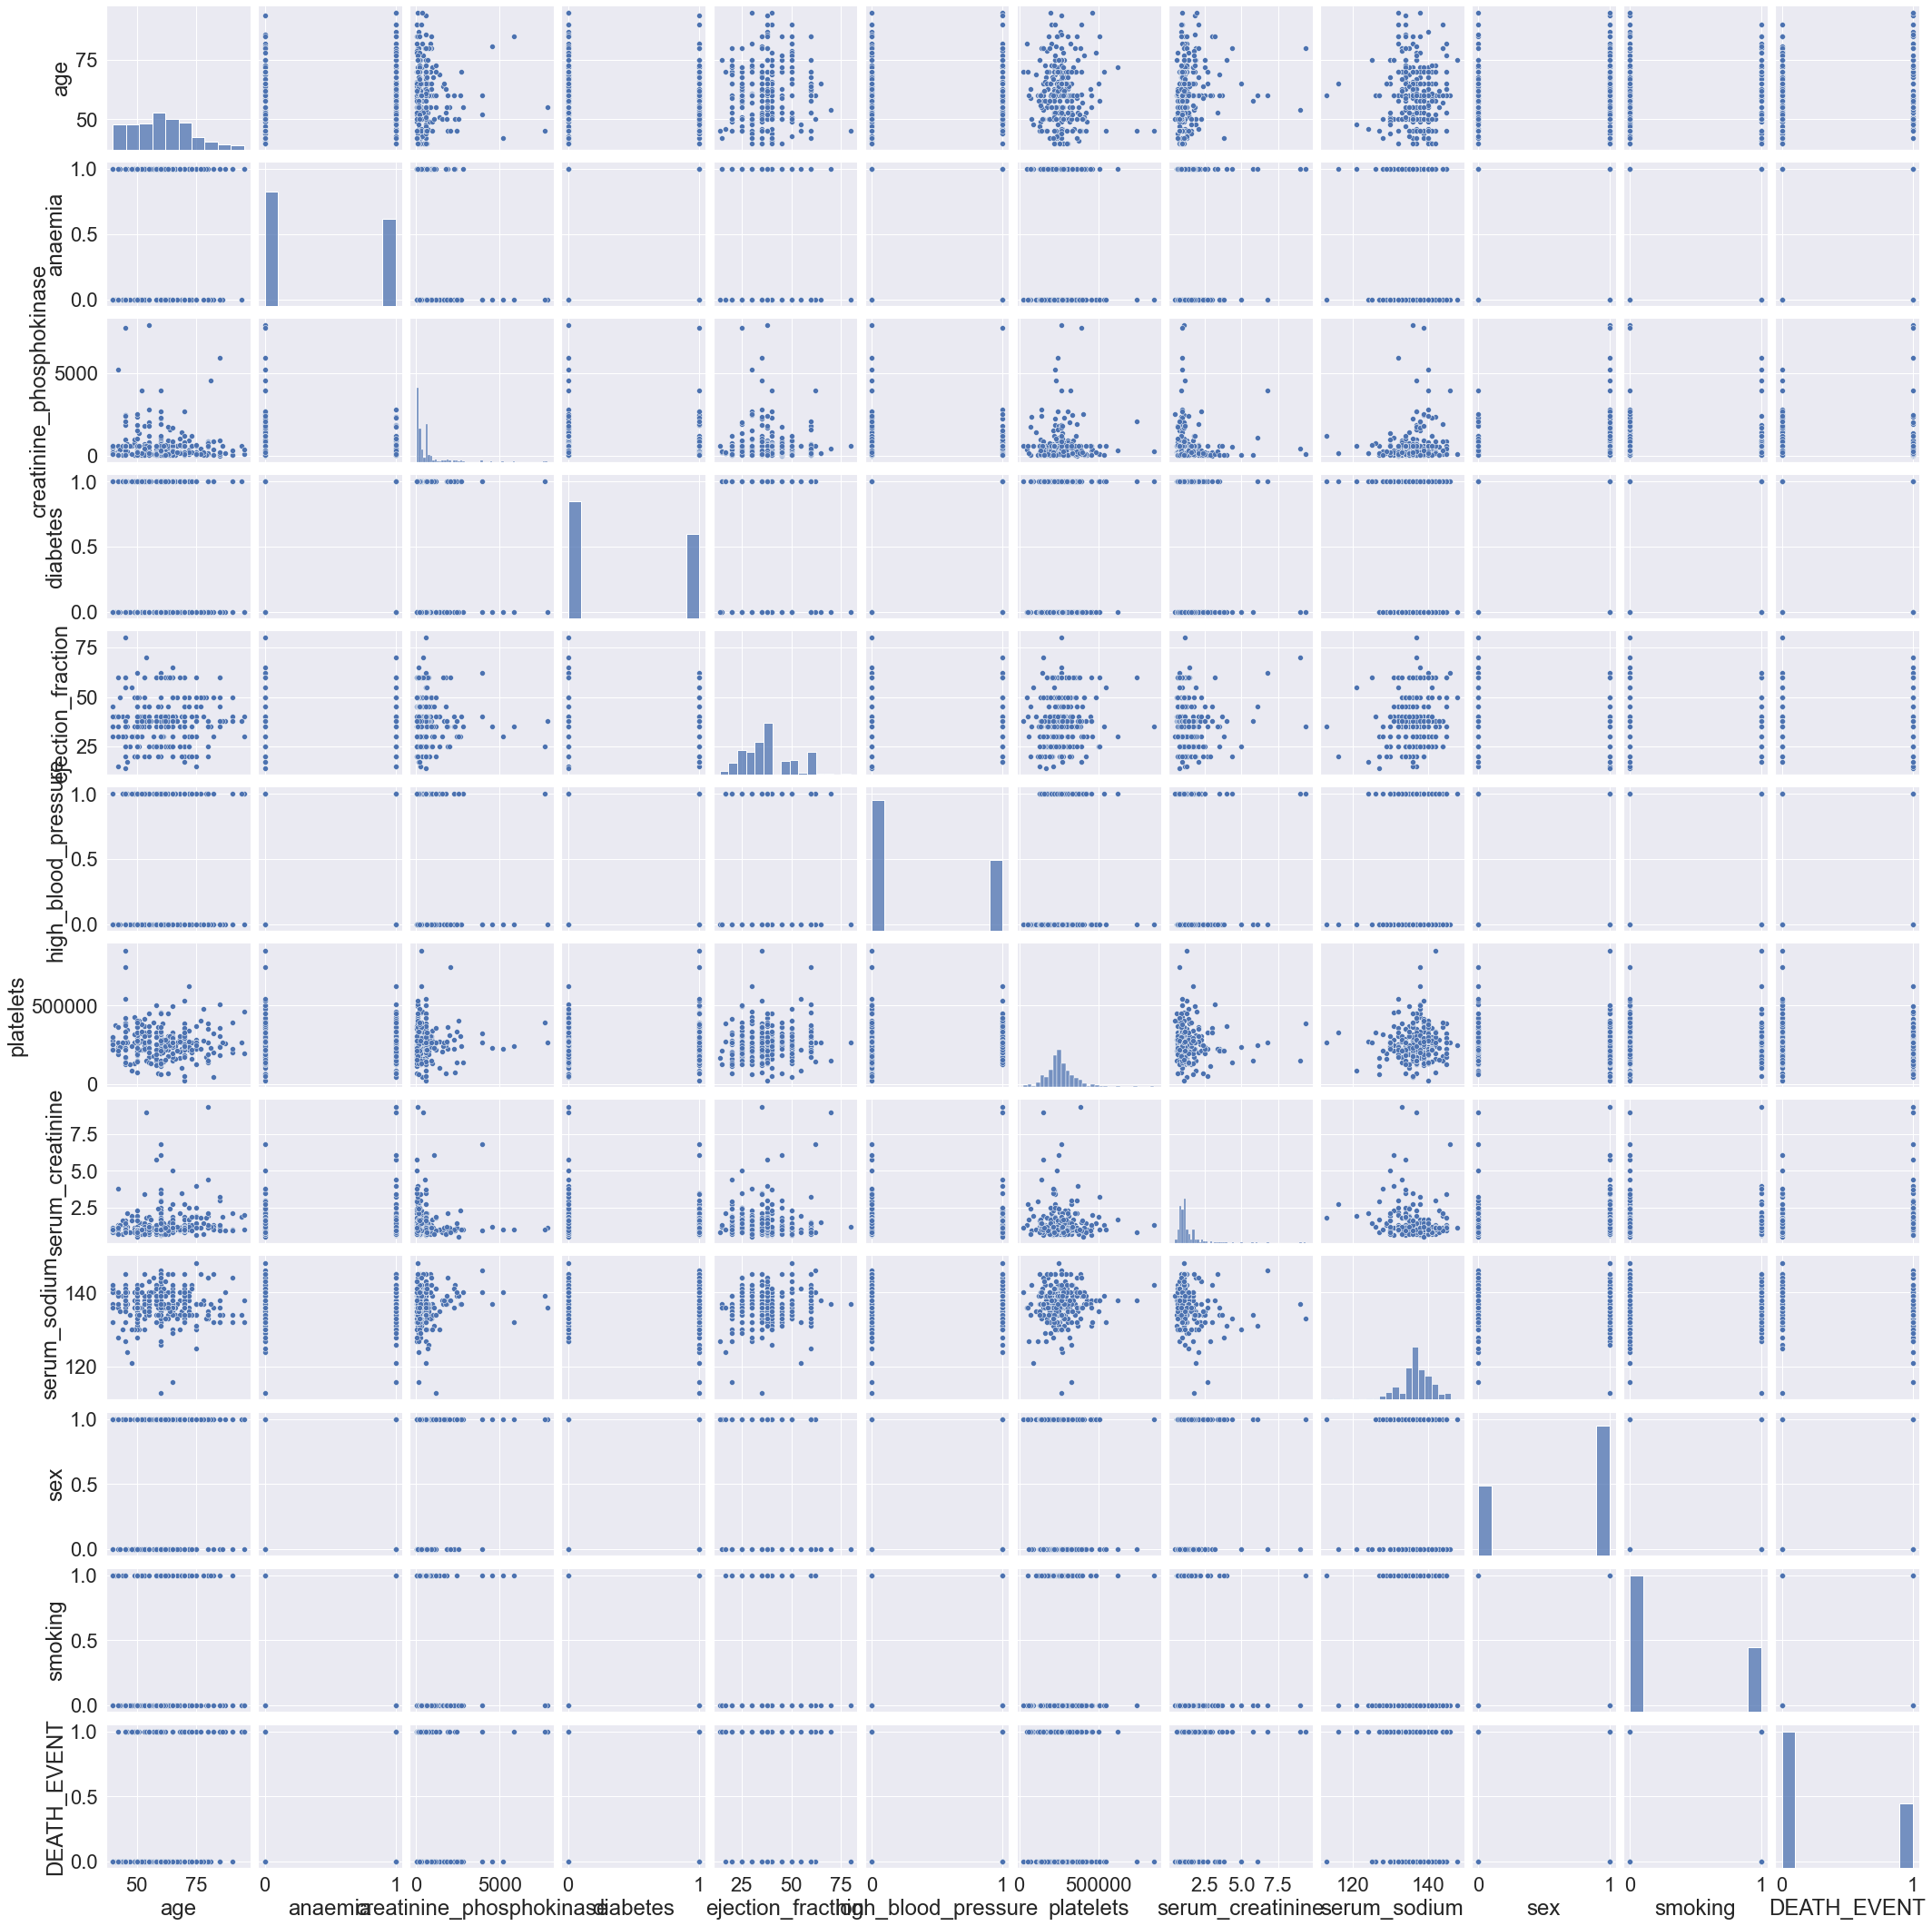

In [192]:
import seaborn as sns
sns.pairplot(heart_failure_df, palette='Dark2')

In [193]:
from sklearn.model_selection import GridSearchCV

In [194]:
param_grid = {'C': [0.1,1, 10, 100], 
              'gamma': [1,0.1,0.01,0.001],
              'kernel': ['rbf', 'poly', 'sigmoid']}

In [195]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.686 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.686 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.706 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.706 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.686 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.745 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.784 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.784 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.800 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.725 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid

[CV 4/5] END .........C=10, gamma=1, kernel=rbf;, score=0.686 total time=   0.0s
[CV 5/5] END .........C=10, gamma=1, kernel=rbf;, score=0.780 total time=   0.0s
[CV 1/5] END ........C=10, gamma=1, kernel=poly;, score=0.706 total time=   0.0s
[CV 2/5] END ........C=10, gamma=1, kernel=poly;, score=0.784 total time=   0.0s
[CV 3/5] END ........C=10, gamma=1, kernel=poly;, score=0.784 total time=   0.0s
[CV 4/5] END ........C=10, gamma=1, kernel=poly;, score=0.765 total time=   0.0s
[CV 5/5] END ........C=10, gamma=1, kernel=poly;, score=0.880 total time=   0.0s
[CV 1/5] END .....C=10, gamma=1, kernel=sigmoid;, score=0.647 total time=   0.0s
[CV 2/5] END .....C=10, gamma=1, kernel=sigmoid;, score=0.510 total time=   0.0s
[CV 3/5] END .....C=10, gamma=1, kernel=sigmoid;, score=0.686 total time=   0.0s
[CV 4/5] END .....C=10, gamma=1, kernel=sigmoid;, score=0.706 total time=   0.0s
[CV 5/5] END .....C=10, gamma=1, kernel=sigmoid;, score=0.580 total time=   0.0s
[CV 1/5] END .......C=10, ga

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=3)

In [196]:
print(grid.best_estimator_)

SVC(C=1, gamma=1, kernel='poly')


In [197]:
y_pred = grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print ("Accuracy : ", accuracy_score(y_test, y_pred))

[[21  5]
 [12  7]]
              precision    recall  f1-score   support

           0       0.64      0.81      0.71        26
           1       0.58      0.37      0.45        19

    accuracy                           0.62        45
   macro avg       0.61      0.59      0.58        45
weighted avg       0.61      0.62      0.60        45

Accuracy :  0.6222222222222222


In [198]:
print(grid.best_params_)

{'C': 1, 'gamma': 1, 'kernel': 'poly'}


In [199]:
matthews_corrcoef(y_test, y_pred)

0.19670173254526363

In [200]:
fpr1, tpr1, thresholds = roc_curve(y_test, y_pred, pos_label=1)
roc_auc1 = auc(fpr1, tpr1)

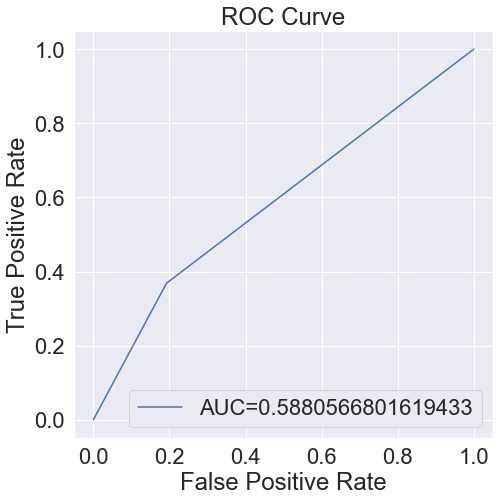

In [201]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
plt.plot(fpr1, tpr1, label='AUC='+str(roc_auc1))
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

#  Try Naive Bayes

In [202]:
from sklearn.naive_bayes import GaussianNB

In [203]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [204]:
y_pred = model.predict(X_test)

In [205]:
accuracy_score(y_test, y_pred)

0.6888888888888889

In [206]:
parameters = {
  'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]
}
cv_model = GridSearchCV(estimator=model, param_grid=parameters, cv=5, verbose=3, scoring='accuracy')
cv_model.fit(X_train, y_train)
cv_model.best_params_

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV 1/5] END ................var_smoothing=0.01;, score=0.706 total time=   0.0s
[CV 2/5] END ................var_smoothing=0.01;, score=0.706 total time=   0.0s
[CV 3/5] END ................var_smoothing=0.01;, score=0.765 total time=   0.0s
[CV 4/5] END ................var_smoothing=0.01;, score=0.784 total time=   0.0s
[CV 5/5] END ................var_smoothing=0.01;, score=0.820 total time=   0.0s
[CV 1/5] END ...............var_smoothing=0.001;, score=0.706 total time=   0.0s
[CV 2/5] END ...............var_smoothing=0.001;, score=0.706 total time=   0.0s
[CV 3/5] END ...............var_smoothing=0.001;, score=0.765 total time=   0.0s
[CV 4/5] END ...............var_smoothing=0.001;, score=0.784 total time=   0.0s
[CV 5/5] END ...............var_smoothing=0.001;, score=0.820 total time=   0.0s
[CV 1/5] END ..............var_smoothing=0.0001;, score=0.706 total time=   0.0s
[CV 2/5] END ..............var_smoothing=0.0001;

{'var_smoothing': 0.01}

In [207]:
model = GaussianNB(var_smoothing=0.01)
model.fit(X_train, y_train)

GaussianNB(var_smoothing=0.01)

In [208]:
y_pred = model.predict(X_test)

In [209]:
accuracy_score(y_test, y_pred)

0.6888888888888889

In [210]:
cm = confusion_matrix(y_test, y_pred)

print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[22  4]
 [10  9]]


In [211]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.85      0.76        26
           1       0.69      0.47      0.56        19

    accuracy                           0.69        45
   macro avg       0.69      0.66      0.66        45
weighted avg       0.69      0.69      0.68        45



In [212]:
matthews_corrcoef(y_test, y_pred)

0.348535441841815

In [213]:
fpr1, tpr1, thresholds = roc_curve(y_test, y_pred, pos_label=1)
roc_auc1 = auc(fpr1, tpr1)

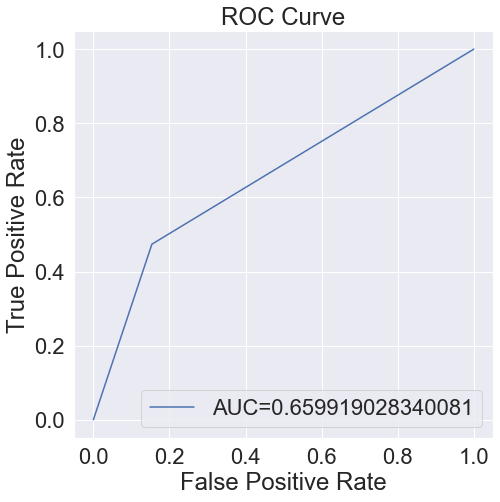

In [214]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
plt.plot(fpr1, tpr1, label='AUC='+str(roc_auc1))
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [215]:
# ! pip install deslib

In [216]:
# check deslib version
import deslib
print(deslib.__version__)

0.3.5


#  Try Ensemble Method k-Nearest Neighbor Oracle a KNORA-Eliminate Model

In [217]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from deslib.des.knora_e import KNORAE

model = KNORAE()
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.723 (0.057)


In [218]:
model.fit(X_train, y_train)

KNORAE()

In [219]:
y_pred = model.predict(X_test)

In [220]:
accuracy_score(y_test, y_pred)

0.6666666666666666

In [221]:
cm = confusion_matrix(y_test, y_pred)

print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[20  6]
 [ 9 10]]


In [222]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.77      0.73        26
           1       0.62      0.53      0.57        19

    accuracy                           0.67        45
   macro avg       0.66      0.65      0.65        45
weighted avg       0.66      0.67      0.66        45



In [223]:
matthews_corrcoef(y_test, y_pred)

0.30495123115910355

In [224]:
fpr1, tpr1, thresholds = roc_curve(y_test, y_pred, pos_label=1)
roc_auc1 = auc(fpr1, tpr1)

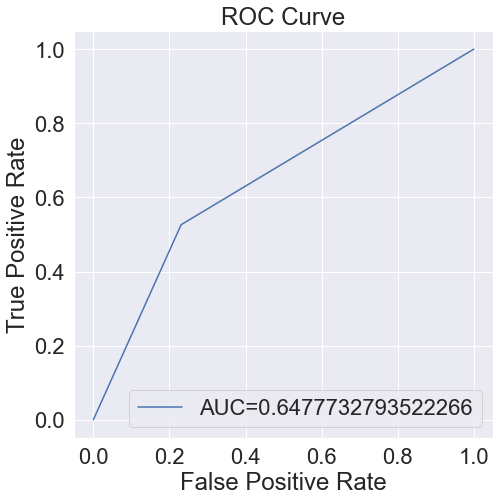

In [225]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
plt.plot(fpr1, tpr1, label='AUC='+str(roc_auc1))
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

#  Try a KNORA-Union model

In [226]:
model = KNORAE()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.708 (0.079)


In [227]:
model.fit(X_train, y_train)

KNORAE()

In [228]:
y_pred = model.predict(X_test)

In [229]:
accuracy_score(y_test, y_pred)

0.6222222222222222

In [230]:
cm = confusion_matrix(y_test, y_pred)

print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[19  7]
 [10  9]]


In [231]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.73      0.69        26
           1       0.56      0.47      0.51        19

    accuracy                           0.62        45
   macro avg       0.61      0.60      0.60        45
weighted avg       0.62      0.62      0.62        45



In [232]:
matthews_corrcoef(y_test, y_pred)

0.2109594133360922

In [233]:
fpr1, tpr1, thresholds = roc_curve(y_test, y_pred, pos_label=1)
roc_auc1 = auc(fpr1, tpr1)

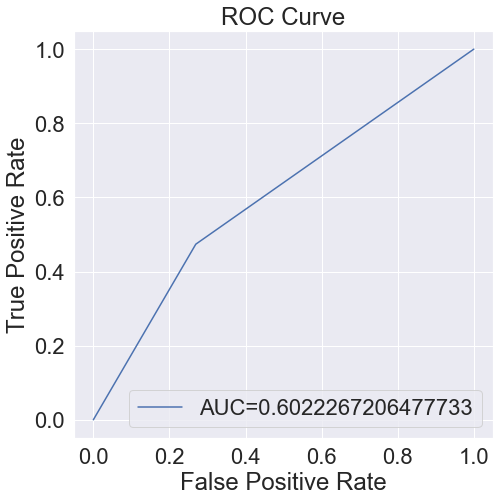

In [234]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
plt.plot(fpr1, tpr1, label='AUC='+str(roc_auc1))
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

#  Try out KNORA-U in kNN for k = from 2 to 21

In [235]:
from deslib.des.knora_u import KNORAU
from matplotlib import pyplot

>2 0.729 (0.070)
>3 0.718 (0.072)
>4 0.714 (0.073)
>5 0.728 (0.077)
>6 0.716 (0.058)
>7 0.709 (0.091)
>8 0.733 (0.078)
>9 0.719 (0.085)
>10 0.705 (0.089)
>11 0.736 (0.084)
>12 0.741 (0.072)
>13 0.720 (0.065)
>14 0.716 (0.089)
>15 0.719 (0.079)
>16 0.725 (0.083)
>17 0.719 (0.083)
>18 0.724 (0.070)
>19 0.747 (0.074)
>20 0.725 (0.083)
>21 0.724 (0.070)


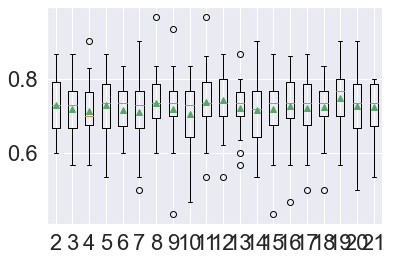

<Figure size 2880x2808 with 0 Axes>

In [236]:
def get_models():
 models = dict()
 for n in range(2,22):
     models[str(n)] = KNORAU(k=n)
 return models
 
# evaluate a given model using cross-validation
def evaluate_model(model):
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
 scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
 return scores
 
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
 scores = evaluate_model(model)
 results.append(scores)
 names.append(name)
 print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
plt.figure(figsize=(40, 39))
pyplot.show()

# Try out KNORAU Model choosing type of classifier

In [237]:
from sklearn.tree import DecisionTreeClassifier
classifiers = [
 LogisticRegression(),
 DecisionTreeClassifier(),
 GaussianNB()]
# fit each classifier on the training set
for c in classifiers:
 c.fit(X_train, y_train)
# define the KNORA-U model
model = KNORAU(pool_classifiers=classifiers)
# fit the model
model.fit(X_train, y_train)
# make predictions on the test set
yhat = model.predict(X_test)
# evaluate predictions
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % (score))

Accuracy: 0.689


In [238]:
cm = confusion_matrix(y_test, y_pred)

print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[19  7]
 [10  9]]


In [239]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.73      0.69        26
           1       0.56      0.47      0.51        19

    accuracy                           0.62        45
   macro avg       0.61      0.60      0.60        45
weighted avg       0.62      0.62      0.62        45



In [240]:
matthews_corrcoef(y_test, y_pred)

0.2109594133360922

In [241]:
fpr1, tpr1, thresholds = roc_curve(y_test, y_pred, pos_label=1)
roc_auc1 = auc(fpr1, tpr1)

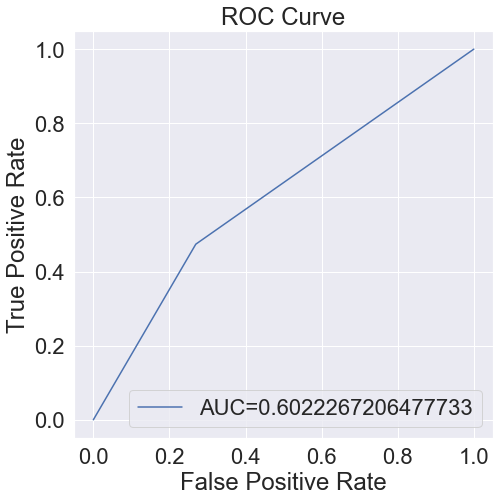

In [242]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
plt.plot(fpr1, tpr1, label='AUC='+str(roc_auc1))
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [243]:
# evaluate contributing models
for c in classifiers:
 y_pred = c.predict(X_test)
 score = accuracy_score(y_test, y_pred)
 print('>%s: %.3f' % (c.__class__.__name__, score))

>LogisticRegression: 0.667
>DecisionTreeClassifier: 0.622
>GaussianNB: 0.689


#   Try KNORA with RandomForest Ensemble

In [244]:
pool = RandomForestClassifier(n_estimators=1000)
# fit the classifiers on the training set
pool.fit(X_train, y_train)
# define the KNORA-U model
model = KNORAU(pool_classifiers=pool)

In [245]:
model.fit(X_train, y_train)
# make predictions on the test set
yhat = model.predict(X_test)
# evaluate predictions
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % (score))
# evaluate the standalone model
y_pred = pool.predict(X_test)
score = accuracy_score(y_test, y_pred)
print('>%s: %.3f' % (pool.__class__.__name__, score))

Accuracy: 0.667
>RandomForestClassifier: 0.667


In [246]:
cm = confusion_matrix(y_test, y_pred)

print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[19  7]
 [ 8 11]]


In [247]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.73      0.72        26
           1       0.61      0.58      0.59        19

    accuracy                           0.67        45
   macro avg       0.66      0.65      0.66        45
weighted avg       0.66      0.67      0.67        45



In [248]:
matthews_corrcoef(y_test, y_pred)

0.3122553023075242

In [249]:
fpr1, tpr1, thresholds = roc_curve(y_test, y_pred, pos_label=1)
roc_auc1 = auc(fpr1, tpr1)

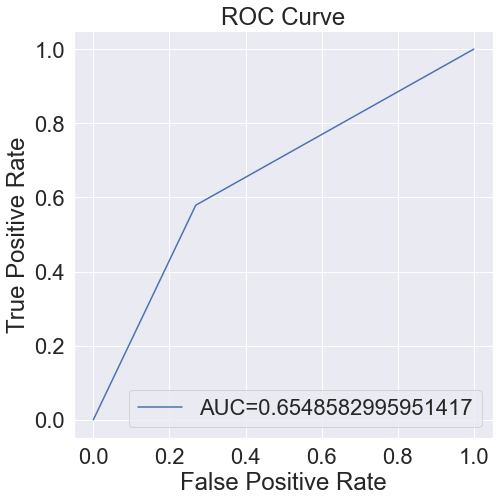

In [250]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
plt.plot(fpr1, tpr1, label='AUC='+str(roc_auc1))
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

#  It is particularly challenging to model for a death_event on this real-world dataset. There are clearly no well-correlated features with survival. Scientists and researchers were hopeful that ML would be helpful. As of now, ML has helped present the most important features which allow us to produce better models with only two or three features. Because of the imbalance of survived in the dataset where there are 203 survived(0) and 96 died(1), I expect the models to make better predictions on the survived than on the died. 1 never fares better than 0 in the all-important precision and recall metrics. The  XGBClassifier produced the best model. It provided an accuracy of 71%. More importantly it produced a precision of 0.76 on 0 and 0.65 on 1, and a recall of 0.73 on 0 and 0.68 on 1. Its MCC of 0.41 crushed the MCCs of the other models. The simple logistic regression between ejection_fraction and death_event produced an accuracy of 67%. A look at the classification report shows a recall of 1 on 0 and a precision of 1 on 1. However the precision on 0 is only 0.63 and the recall of 0.21 on 1 shows a different story. The MCC of 0.37 is our second highest. The ROC curve and AUC=0.61 show the model to be wanting. The problem required the ensemble method of the XGBClassifier to provide the best model relative to the others.

#  Milestone 4

#  Create graphs comparing continuous features to the death event. Present these visualizations in the final project report to illustrate how all feature do not have any strong correlation with the death event.

Text(0.5, 1.0, 'Compare Ejection Fraction to Death Event')

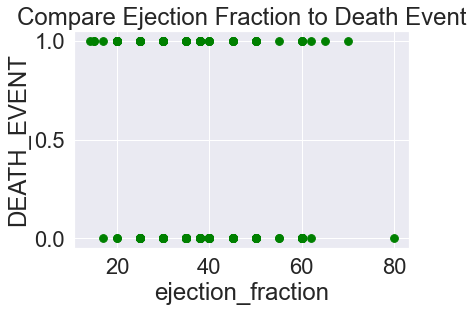

In [251]:
heart_failure_df.plot.scatter(x='ejection_fraction', y='DEATH_EVENT', s=60, c='green')
plt.title('Compare Ejection Fraction to Death Event')

Text(0.5, 1.0, 'Compare Serum Creatinine to Death Event')

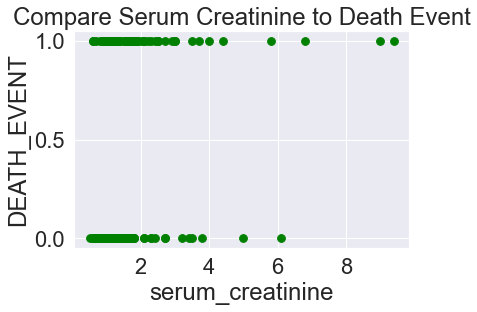

In [252]:
heart_failure_df.plot.scatter(x='serum_creatinine', y='DEATH_EVENT', s=60, c='green')
plt.title('Compare Serum Creatinine to Death Event')

Text(0.5, 1.0, 'Compare Age to Death Event')

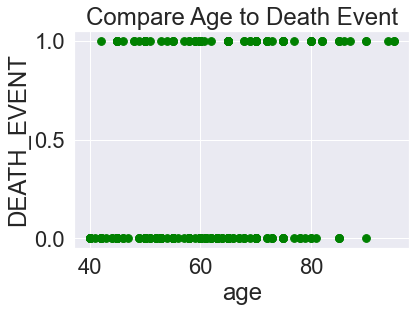

In [253]:
heart_failure_df.plot.scatter(x='age', y='DEATH_EVENT', s=60, c='green')
plt.title('Compare Age to Death Event')

<AxesSubplot:xlabel='anaemia', ylabel='DEATH_EVENT'>

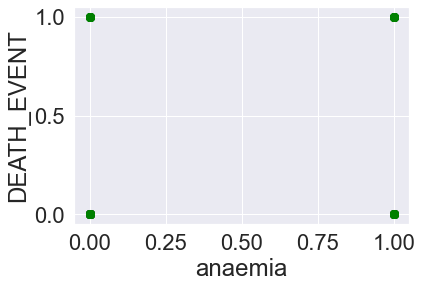

In [254]:
heart_failure_df.plot.scatter(x='anaemia', y='DEATH_EVENT', s=60, c='green')

Text(0.5, 1.0, 'Compare CPK to Death Event')

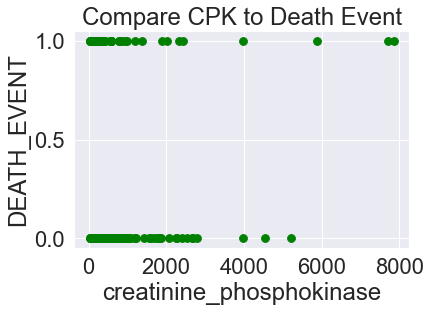

In [255]:
heart_failure_df.plot.scatter(x='creatinine_phosphokinase', y='DEATH_EVENT', s=60, c='green')
plt.title('Compare CPK to Death Event')

<AxesSubplot:xlabel='diabetes', ylabel='DEATH_EVENT'>

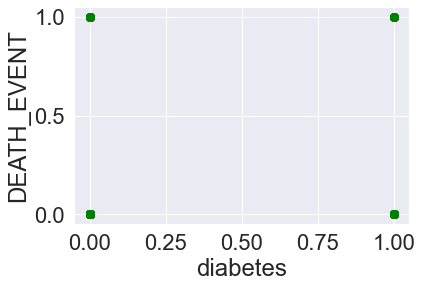

In [256]:
heart_failure_df.plot.scatter(x='diabetes', y='DEATH_EVENT', s=60, c='green')

Text(0.5, 1.0, 'Compare Platelets to Death Event')

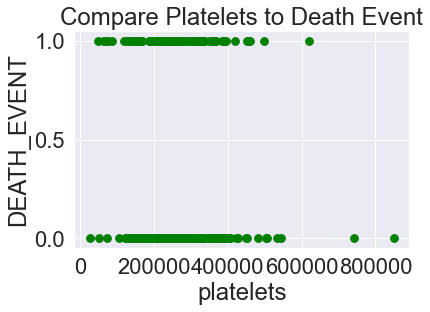

In [257]:
heart_failure_df.plot.scatter(x='platelets', y='DEATH_EVENT', s=60, c='green')
plt.title('Compare Platelets to Death Event')

In [258]:
heart_failure_df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'DEATH_EVENT'],
      dtype='object')

Text(0.5, 1.0, 'Compare Serum Sodium to Death Event')

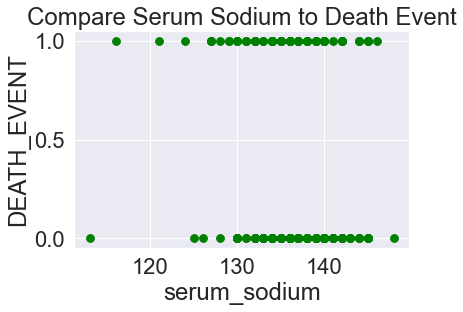

In [259]:
heart_failure_df.plot.scatter(x='serum_sodium', y='DEATH_EVENT', s=60, c='green')
plt.title('Compare Serum Sodium to Death Event')

<AxesSubplot:xlabel='sex', ylabel='DEATH_EVENT'>

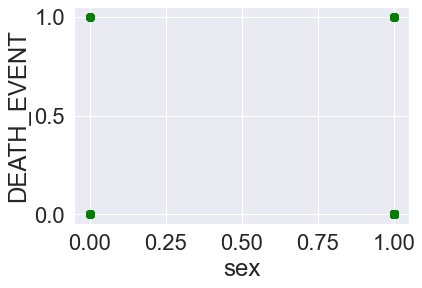

In [260]:
heart_failure_df.plot.scatter(x='sex', y='DEATH_EVENT', s=60, c='green')

#  I went back and calculated MCCs and AUCs for models that I did not previously calculate for.